In [63]:
import pandas as pd
import matplotlib.pyplot as plt
plt.tight_layout()
dataset = pd.read_parquet("data/final2.parquet")

<Figure size 640x480 with 0 Axes>

array([[<AxesSubplot: title={'center': 'roll'}>,
        <AxesSubplot: title={'center': 'x'}>,
        <AxesSubplot: title={'center': 'y'}>],
       [<AxesSubplot: title={'center': 'light_turn'}>,
        <AxesSubplot: title={'center': 'utility'}>,
        <AxesSubplot: title={'center': 'light_score'}>],
       [<AxesSubplot: title={'center': 'dark_score'}>,
        <AxesSubplot: title={'center': 'light_left'}>,
        <AxesSubplot: title={'center': 'dark_left'}>]], dtype=object)

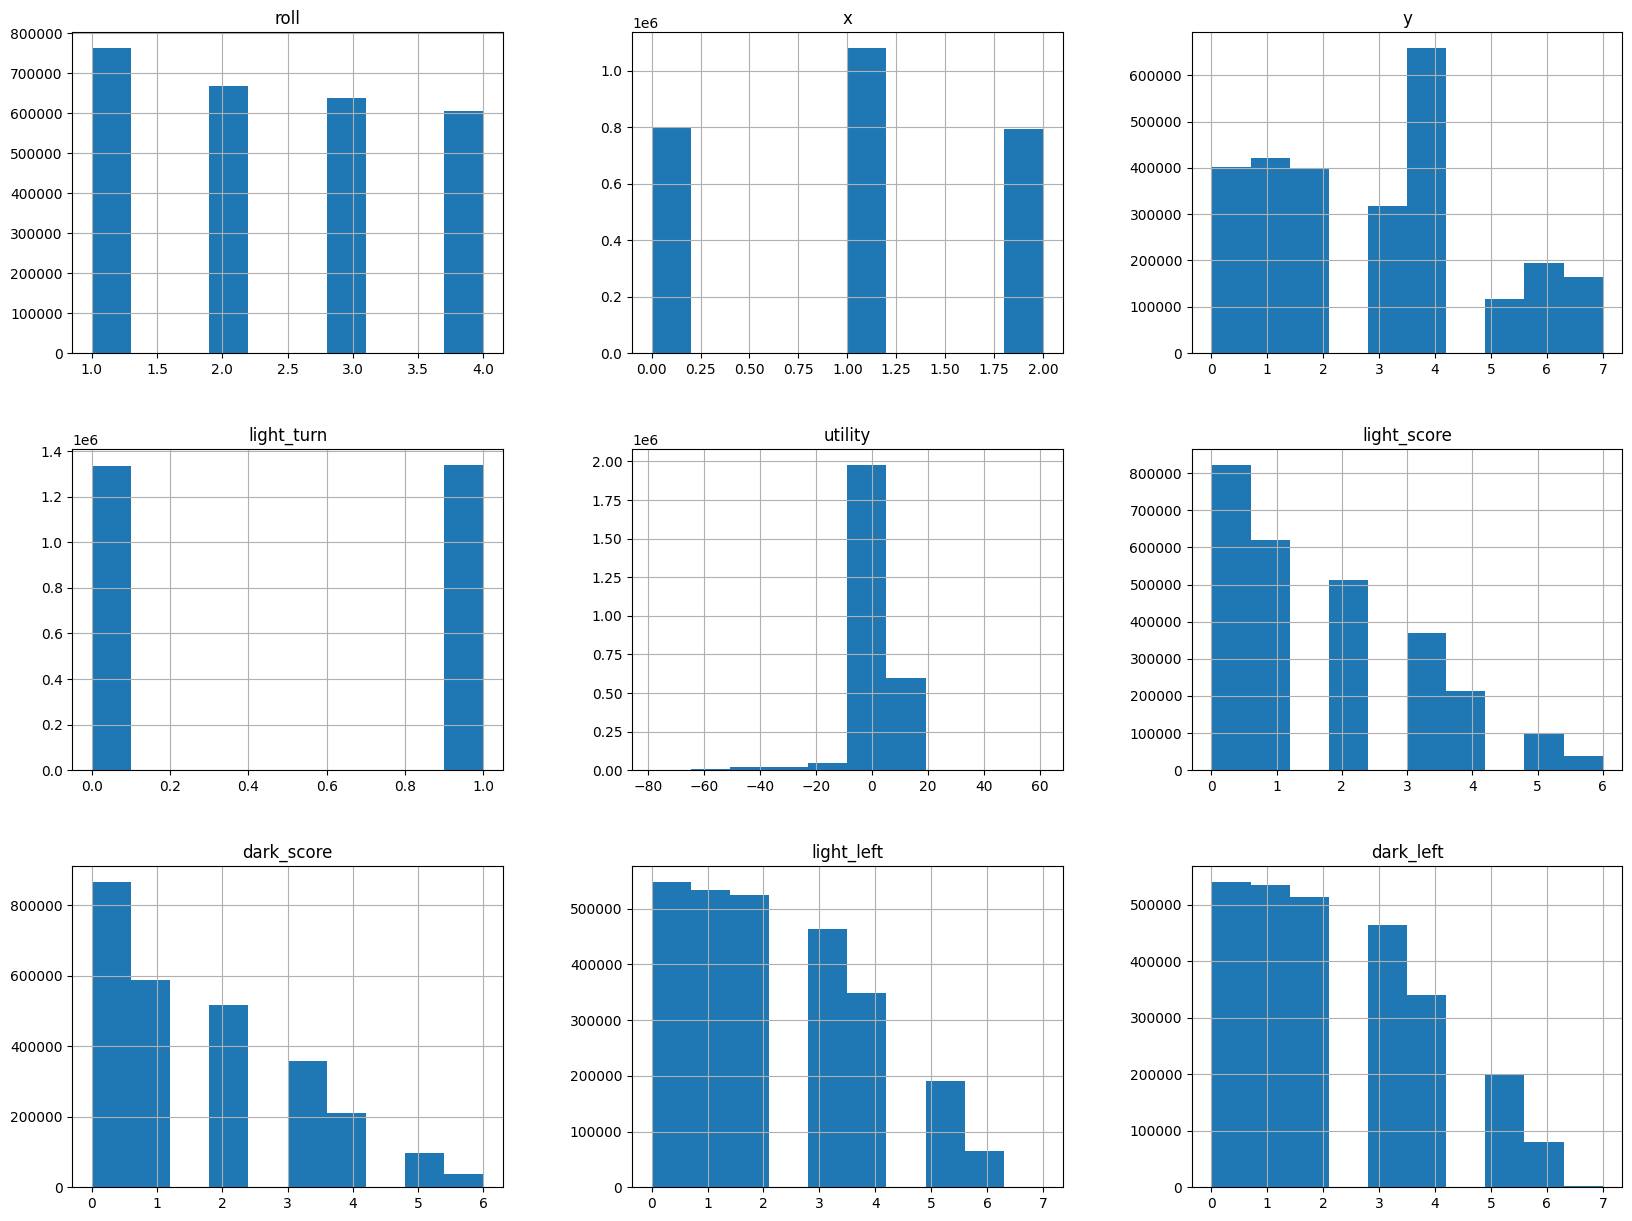

In [64]:
dataset.astype({'light_turn': 'int32'}).hist(figsize=(20, 15))

In [65]:
dataset.astype({'light_turn': 'int32'}).describe()

,roll,x,y,light_turn,utility,light_score,dark_score,light_left,dark_left
count,2.675570e+06,2.675570e+06,2.675570e+06,2.675570e+06,2.675570e+06,2.675570e+06,2.675570e+06,2.675570e+06,2.675570e+06
mean,2.404940e+00,9.981047e-01,2.882898e+00,5.010663e-01,6.454458e-01,1.617224e+00,1.588297e+00,2.136976e+00,2.171319e+00
std,1.124120e+00,7.717853e-01,2.044674e+00,4.999990e-01,7.878802e+00,1.527103e+00,1.531372e+00,1.652820e+00,1.681893e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.871895e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-2.379265e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,9.836856e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
75%,3.000000e+00,2.000000e+00,4.000000e+00,1.000000e+00,4.747772e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
max,4.000000e+00,2.000000e+00,7.000000e+00,1.000000e+00,6.123599e+01,6.000000e+00,6.000000e+00,7.000000e+00,7.000000e+00


In [66]:
dataset.head()

,game,roll,x,y,light_turn,utility,light_score,dark_score,light_left,dark_left
0,--- L-- --- --D .-. .-. --- ---,2,2,4,False,2.586376,0,0,6,6
1,--- L-- --- --D .-. .-. --- ---,2,2,3,False,0.982283,0,0,6,6
2,--- L-- --- --D .-. .-. --- ---,3,2,4,False,3.878781,0,0,6,6
3,--- L-- --- --D .-. .-. --- ---,3,2,3,False,4.249838,0,0,6,6
4,--- L-- --- --D .-. .-. --- ---,4,2,4,False,5.577292,0,0,6,6


In [67]:
df = dataset.copy()
j = df['game'].str.replace('\s|\.', '', regex=True).str.replace('D', '3').str.replace('L', '1').str.replace('-', '2').str.split('', expand=True)
j = j.drop([0, 21], axis=1).astype("int32") - 2
#j
k = ['game' + str(i) for i in range(20)]
df[k] = j
df = df.drop(columns=["game"])

In [68]:
df.to_parquet("data/dataset2.parquet")

In [5]:
dataset.columns

Index(['game', 'roll', 'x', 'y', 'light_turn', 'utility', 'light_score',
       'dark_score', 'light_left', 'dark_left'],
      dtype='object')

In [69]:
df_roll_1 = dataset.query("roll == 1").pivot_table(values='utility', index='y', columns='x')
df_roll_2 = dataset.query("roll == 2").pivot_table(values='utility', index='y', columns='x')
df_roll_3 = dataset.query("roll == 3").pivot_table(values='utility', index='y', columns='x')
df_roll_4 = dataset.query("roll == 4").pivot_table(values='utility', index='y', columns='x')

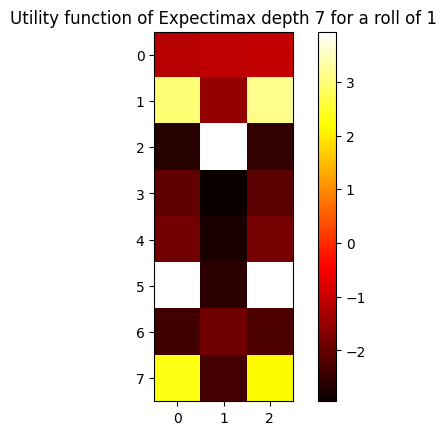

763840


In [70]:
plt.imshow(df_roll_1, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Utility function of Expectimax depth 7 for a roll of 1")
plt.show()
print(len(dataset.query("roll == 1")))

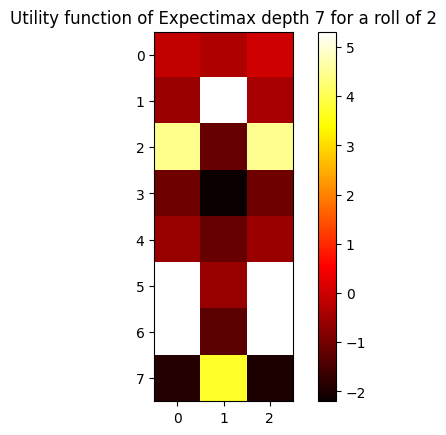

668732


In [71]:
plt.imshow(df_roll_2, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Utility function of Expectimax depth 7 for a roll of 2")
plt.show()
print(len(dataset.query("roll == 2")))

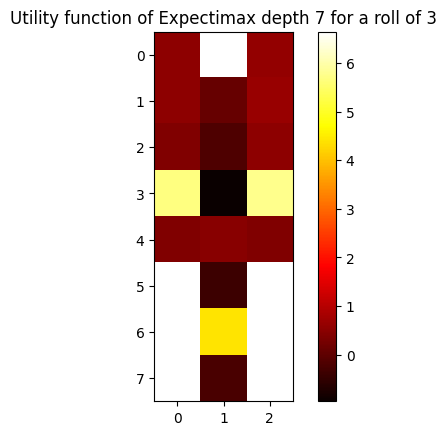

638710


In [72]:
plt.imshow(df_roll_3, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Utility function of Expectimax depth 7 for a roll of 3")
plt.show()
print(len(dataset.query("roll == 3")))

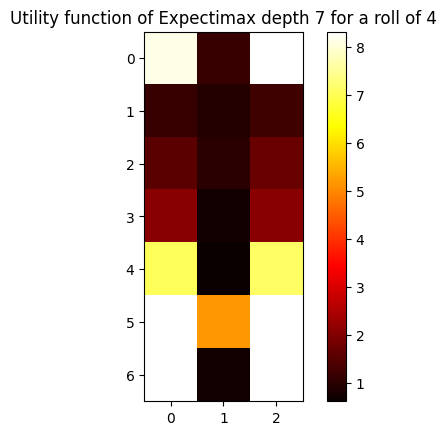

604288


In [73]:
plt.imshow(df_roll_4, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Utility function of Expectimax depth 7 for a roll of 4")
plt.show()
print(len(dataset.query("roll == 4")))

In [12]:
df

NameError: name 'df' is not defined